<hr style="border-width:3px; border-color:coral"/>
# Reading and plotting data from file
<hr style="border-width:3px; border-color:coral"/>

We can create and read data from files in four different ways. We can store the data as a text file, or as a
binary file.  And, we can store meta data in the file, or supply it explicitly. 

* <a href="#text">Text file (no meta data)</a>.  Data created from **io_text_demo.c**
* <a href="#textheader">Text file (with meta data)</a>.  Data created from **io_text_header_demo.c**
* <a href="#bin">Binary file (no meta data)</a>. Data created from **io_binary_demo.c**
* <a href="#binheader">Binary file (with meta data)</a>. Data created from **io_binary_header_demo.c**

There are several ways to read data from a text file from Numpy (e.g. `numpy.loadtxt`).  Below, we will use 
`numpy.fromfile`.  

All examples below assume that data is node-centered.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<a id="text"></a>
## Text file (no meta data)

The solution (stored in u) is written as text to the file "text.out".  The start of the 
file looks like : 

     1.0000000000000000e+00
     9.9998117528260111e-01
     9.9992470183914450e-01
     9.9983058179582340e-01
     9.9969881869620425e-01
     ....

<IPython.core.display.Javascript object>


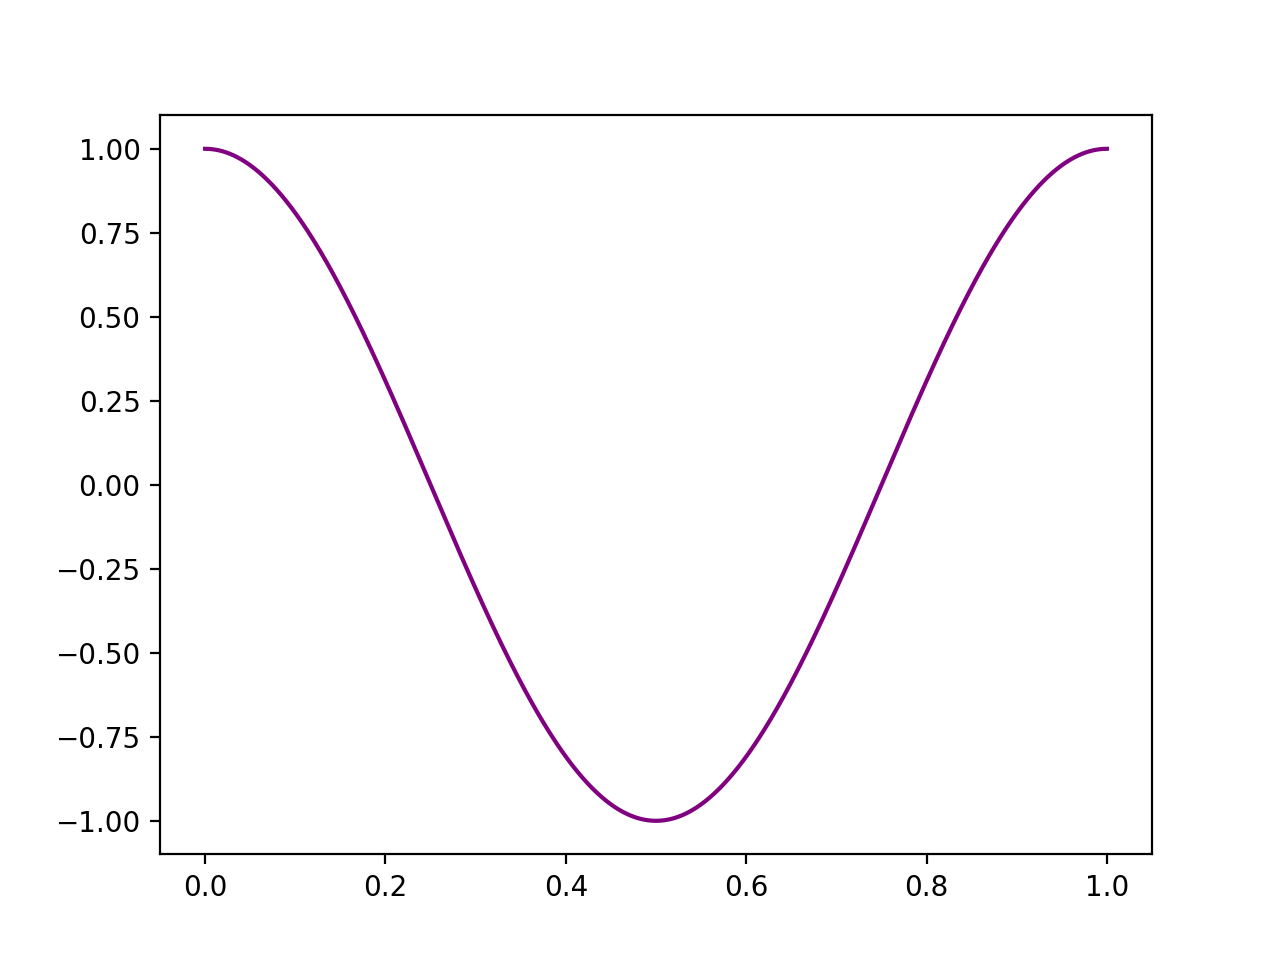

In [2]:
a = 0  # Domain [0,1] hardwired
b = 1

# Open and read file
f = open("text.out","r")
u = np.fromfile(f,dtype='d',sep=' ')   # reads to the end of the file
f.close()

n = len(u)
x = np.linspace(a,b,n)    

plt.figure(1)
plt.plot(x,u,'purple')

<a id="textheader"></a>
## Text file (with meta data)

In addition to the solution, we store "meta data" about the file in the file itself. 
This header information is stored at the start of the file.   Here is what the 
start of the file looks like : 

                       0.00
                       1.00
                       1024
     1.0000000000000000e+00
     9.9998117528260111e-01
     9.9992470183914450e-01
     9.9983058179582340e-01
     ....


<IPython.core.display.Javascript object>


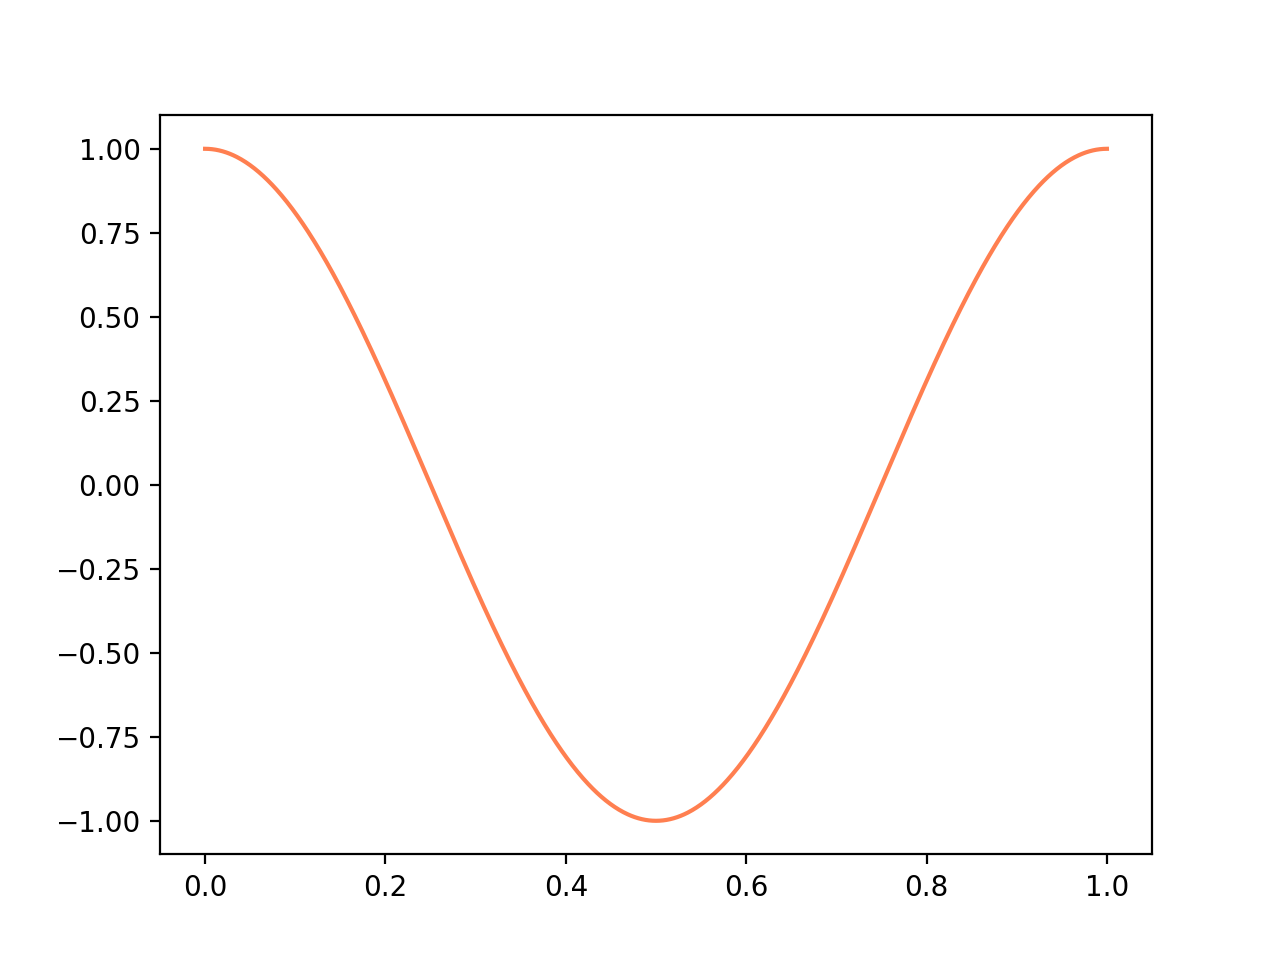

In [5]:
import numpy as np
f = open("text_header.out","r")

# Read meta data explicitly
a = np.fromfile(f,dtype='d',count=1,sep=' ')[0]      # Grab first entry of array.
b = np.fromfile(f,dtype='d',count=1,sep=' ')[0]
n = np.fromfile(f,dtype='int32',count=1,sep=' ')[0]

# read solution. The keyword arg 'count' is not needed here, but is
# included for illustration.
u = np.fromfile(f,dtype='d',count=n+1,sep=' ')  # count not needed
f.close()

# Plot solution
x = np.linspace(a,b,n+1)

plt.figure(2)
plt.plot(x,u,'coral')

<a id="bin"></a>
## Binary file (no meta data)

We can also read data that has been stored in binary.  Binary data is not human-readable,
but we can tell that we have the correct number of entries stored by looking at the 
size of the file. 

  Number of entries (n+1)  1025
                File size  8200 (bytes)
      Data read (8*(n+1))  8200 (bytes)


<IPython.core.display.Javascript object>


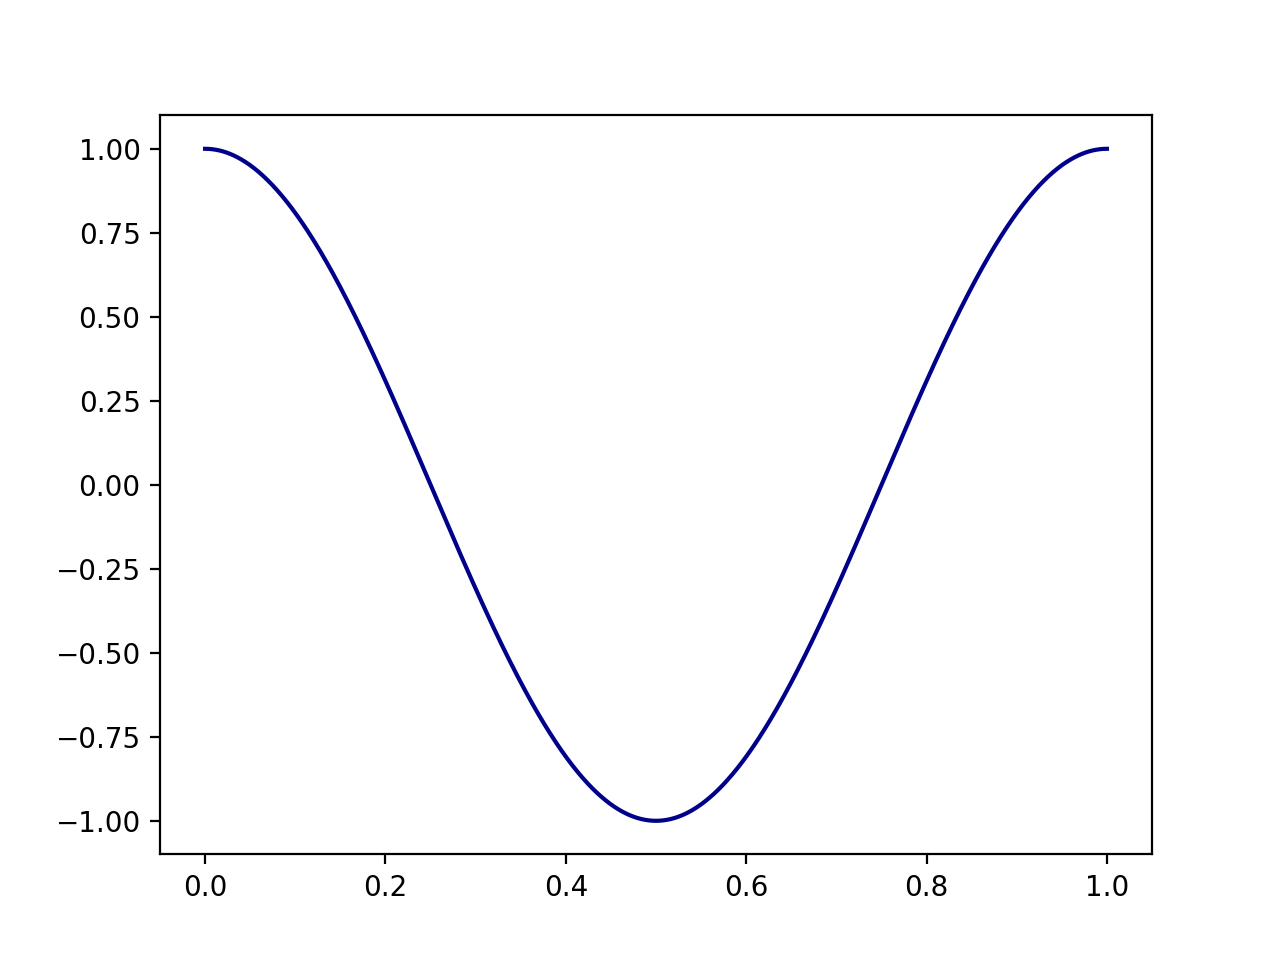

In [17]:
import numpy as np
import os
# Meta data
a = 0
b = 1

file_size = os.path.getsize("bin.out")

# Open file and read solution
f = open("bin.out","rb")
u = np.fromfile(f,dtype='d')
n = len(u) - 1    # n + 1 entries are stored in the file

print("{:>25s} {:5d}".format("Number of entries (n+1)",n+1))
print("{:>25s} {:5d} (bytes)".format("File size",file_size))
print("{:>25s} {:5d} (bytes)".format("Data read (8*(n+1))",8*(n+1)))

# Plot data
x = np.linspace(a,b,n+1)
plt.figure(3)
plt.plot(x,u,'darkblue')

<a id="binheader"></a>
## Binary file (with meta data)

In this file, we store meta data as a header.    In binary, we have to know something about the memory
layout of the header information.  The header in "bin_header.out" contains two doubles (8 bytes each) and 
1 int (4 bytes).  Because memory is aligned at 8 byte boundaries, this header will actually take up 
$8 + 8 + 4 + 4 = 24$ bytes, not the $20$ bytes that we might expect.  Because, 
the binary output format respects the memory layout, we have to skip over the last 4 bytes of the header
before starting to read the solution values. 

We can also verify that we have the expected number of entries by printing out both the file size and 
the total byte count that we read.

    Number of entries (n+1)    4097
                  File size   32800 (bytes)
 Data read (2+n+1)*8 + 2*4)   32800 (bytes)


<IPython.core.display.Javascript object>


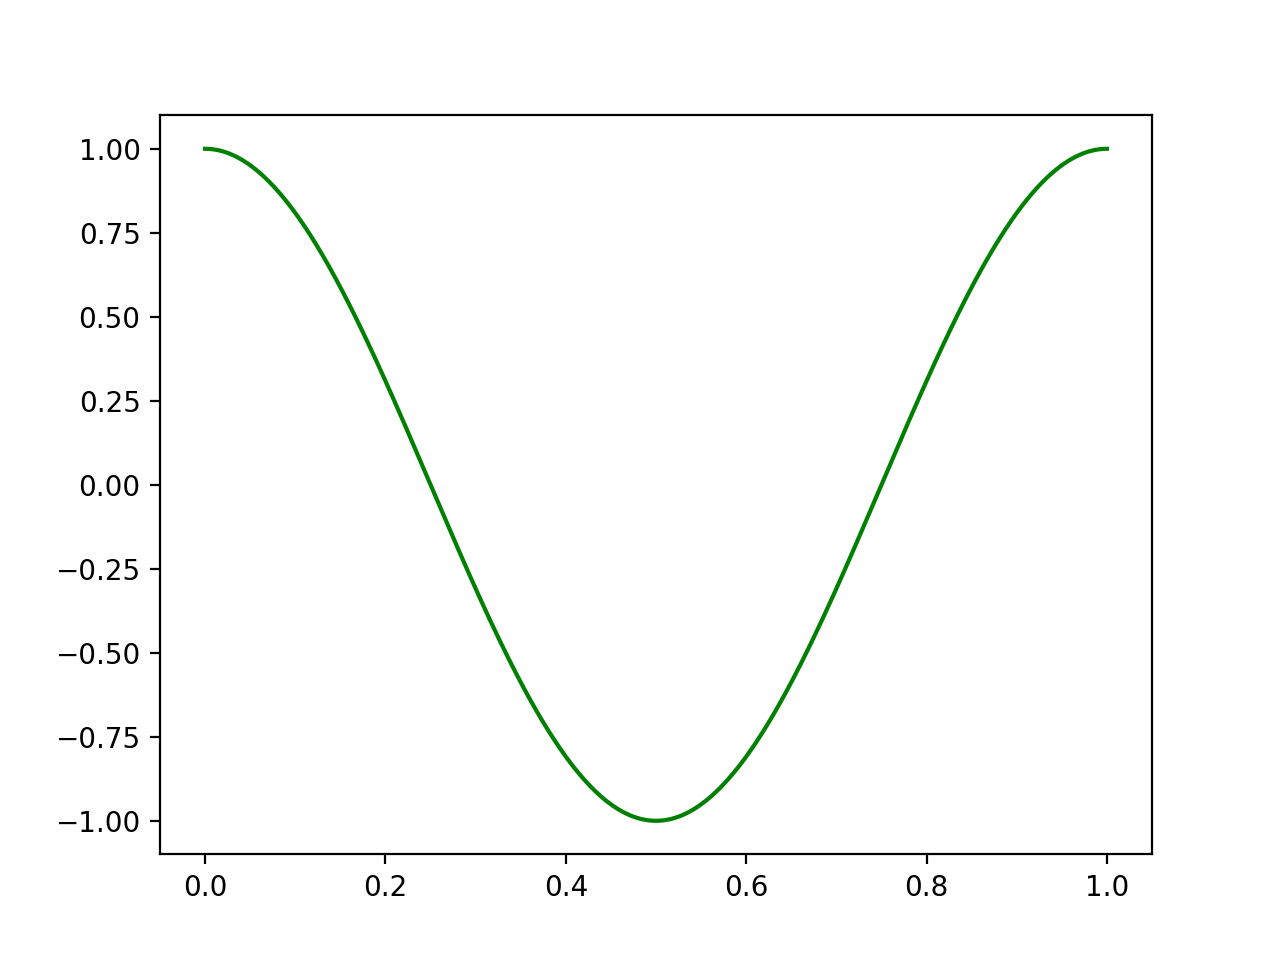

In [21]:
import numpy as np
import os

file_size = os.path.getsize("bin_header.out")

f = open("bin_header.out","rb")

# Open file and read  meta data with specified type
dt = np.dtype([('a','d'),('b','d'),('n','int32')])
a,b,n = np.fromfile(f,dtype=dt,count=1)[0]

print("{:>27s} {:7d}".format("Number of entries (n+1)",n+1))
print("{:>27s} {:7d} (bytes)".format("File size",file_size))
print("{:>27s} {:7d} (bytes)".format("Data read (2+n+1)*8 + 2*4)",8*(2 + n+1) + 2*4))


# Skip 4 bytes of padding after int32
#      -- Second arg : 0=from start of file; 1=relative to current position; 2=from end of file
f.seek(4,1)
u = np.fromfile(f,dtype='d')

# Plot solution
x = np.linspace(a,b,n+1)
plt.figure(4)
plt.plot(x,u,'g-')